<a href="https://colab.research.google.com/github/aryanarora07/ML-AI/blob/main/course4assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

text = "The quest for artificial intelligence, and for artificial beings in general, is almost as old as human history. The ancient Greeks had myths about robots, and Chinese and Egyptian engineers built automatons. In the 17th century, Leibniz and Pascal invented mechanical calculating machines, establishing that computation was a distinct form of intelligence."

tokens = tokenizer.encode(text)
token_strings = [tokenizer.decode([token]) for token in tokens]


print(f"Number of tokens: {len(tokens)}")
print("Tokens and their corresponding text:")
for i, (token, token_text) in enumerate(zip(tokens, token_strings)):
    print(f"{i+1}. Token {token}: '{token_text}'")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Number of tokens: 66
Tokens and their corresponding text:
1. Token 464: 'The'
2. Token 1235: ' quest'
3. Token 329: ' for'
4. Token 11666: ' artificial'
5. Token 4430: ' intelligence'
6. Token 11: ','
7. Token 290: ' and'
8. Token 329: ' for'
9. Token 11666: ' artificial'
10. Token 9791: ' beings'
11. Token 287: ' in'
12. Token 2276: ' general'
13. Token 11: ','
14. Token 318: ' is'
15. Token 2048: ' almost'
16. Token 355: ' as'
17. Token 1468: ' old'
18. Token 355: ' as'
19. Token 1692: ' human'
20. Token 2106: ' history'
21. Token 13: '.'
22. Token 383: ' The'
23. Token 6156: ' ancient'
24. Token 25059: ' Greeks'
25. Token 550: ' had'
26. Token 22886: ' myths'
27. Token 546: ' about'
28. Token 14193: ' robots'
29. Token 11: ','
30. Token 290: ' and'
31. Token 3999: ' Chinese'
32. Token 290: ' and'
33. Token 14075: ' Egyptian'
34. Token 12037: ' engineers'
35. Token 3170: ' built'
36. Token 3557: ' autom'
37. Token 265: 'at'
38. Token 684: 'ons'
39. Token 13: '.'
40. Token 554: ' In'


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

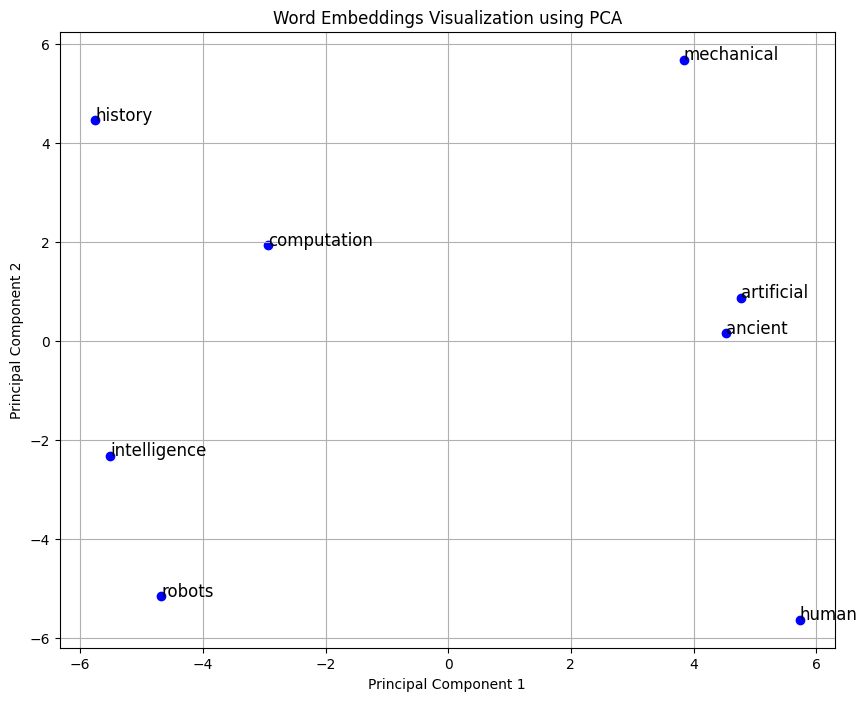

In [2]:
import torch
from transformers import BertModel, BertTokenizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


words = ['artificial', 'intelligence', 'robots', 'history', 'mechanical', 'human', 'ancient', 'computation']


embeddings = []
word_tokens = []

for word in words:

    inputs = tokenizer(word, return_tensors='pt')
    word_token_ids = inputs['input_ids'][0][1:-1]
    word_tokens.append(word_token_ids)

    with torch.no_grad():
        outputs = model(**inputs)


    hidden_states = outputs.last_hidden_state


    word_embedding = hidden_states[0, 1:1+len(word_token_ids), :].mean(dim=0)
    embeddings.append(word_embedding.numpy())


embeddings = np.array(embeddings)

pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1], c='blue')


for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]), fontsize=12)

plt.title('Word Embeddings Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('word_embeddings.png')
plt.show()